### Linear Regression usign Gradient Descent

In this post I am going to write Gradient Descent code in Python from scratch.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
# load booston dataset from sklearn dataset
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
df = pd.DataFrame(data = boston.data)
df.columns = boston.feature_names
df['target'] = boston.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# checking correlation of all variable with target variable
corr = df.corr()
corr['target'].sort_values(ascending =False)

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

In [6]:
# just checking absolute value because in previous cell we see some -ve correlation
corr_values = corr['target'].abs().sort_values(ascending = False)
corr_values

target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

In [7]:
# preprocessing df dataset for descent impelementaion
y = preprocessing.scale(df['target'])
x = df.drop('target', 1)
# Standardize all column
x = preprocessing.scale(x)
x = np.c_[np.ones(x.shape[0]), x]
x.shape

(506, 14)

In [8]:
x

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

### Gradient Descent implementation in python

In [9]:
def gradient_descent(x, y, epoch,alpha, theta):
    cost_list = []
    prediction_list = []
    n = float(len(y))
    for i in range(epoch):
        prediction = np.dot(x, theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*n) * np.dot(error.T, error)
        cost_list.append(cost)
        theta = theta - (alpha * (1/n) * np.dot(x.T, error))
    return cost, theta, cost_list, prediction_list

### for multi variable linear regression

In [10]:
np.random.seed(123) #Set the seed
theta = np.random.rand(14) # random assignment of theta for begin 

epoch = 10000
alpha = 0.01
cost, theta, cost_list, pred_list= gradient_descent(x, y, epoch, alpha, theta)

In [11]:
theta

array([-7.75039860e-16, -1.00993607e-01,  1.17673875e-01,  1.52069840e-02,
        7.42171754e-02, -2.23825718e-01,  2.91079740e-01,  2.09894652e-03,
       -3.37845673e-01,  2.89425553e-01, -2.25663896e-01, -2.24259276e-01,
        9.24299547e-02, -4.07434456e-01])

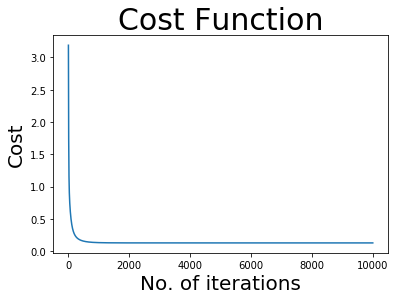

In [12]:
# ploting cost values for each epoch
plt.title('Cost Function', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [13]:
# Predict y values using gradient descent coefficients
y_pred = np.dot(x, theta)

In [14]:
# Mean square of residuals for gradient descent
MSE_GD = ((pred_list[-1]-y)**2).mean()  #From Gradient Descent
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error from Gradient Descent prediction : 0.259


###  Predicting target values using scikit learn

In [15]:
lr = LinearRegression()
#Fitting the model
lr = lr.fit(x,y)

In [16]:
lr_pred = lr.predict(x)

In [18]:
# coefficient values derived from sklearn linear regression 
lr.coef_

array([ 0.        , -0.10101708,  0.1177152 ,  0.0153352 ,  0.07419883,
       -0.22384803,  0.29105647,  0.00211864, -0.33783635,  0.28974905,
       -0.22603168, -0.22427123,  0.09243223, -0.40744693])

In [20]:
### Model performance of sklern model
r2_sk = lr.score(x,y)
print('R square from scikit learn: {}'.format(round(r2_sk,4)))

R square from scikit learn: 0.7406


In [21]:
r2 = 1 - (sum((y - pred_list[-1])**2)) / (sum((y - y.mean())**2))
print('R square doing from the scratch: {}'.format(round(r2,4)))

R square doing from the scratch: 0.7406
